# Data Analysis of the Chicago Dataset

In this Jupyter Notebook we will analyze a bike sharing dataset of the city Chicago of the year 2019. We will also include the hourly weather data of the city during the same time. In the first part we will visualize the data and try to develop a deep understanding of the user types and recurring bahavioral patterns. In the second part we use this knowledge to develop a predicition model which forecasts future demand.

## Getting started: importing the data and getting it in the right format

At first we import all of the required libraries in this notebook. In this case we import *NumPy, Pandas, Matplotlib and Seaborn*. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Next we import the datasets. This is in perticular the dataset of the city Chicago of the year 2019 and the associated weather data. We do this with the library Pandas, therefore both datasets have now the datatype "Pandas Dataframe" ([documentation](https://pandas.pydata.org/docs/reference/frame.html)).

In [2]:
chicago_set = pd.read_csv('chicago_2019.csv')
weather_set = pd.read_csv('weather_hourly_chicago.csv')

We use the commands head() and info() to get a feeling for the data

In [3]:
chicago_set.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Subscriber
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Subscriber
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber


In [4]:
chicago_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818004 entries, 0 to 3818003
Data columns (total 8 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   start_time          object
 1   end_time            object
 2   start_station_id    int64 
 3   end_station_id      int64 
 4   start_station_name  object
 5   end_station_name    object
 6   bike_id             int64 
 7   user_type           object
dtypes: int64(3), object(5)
memory usage: 233.0+ MB


So we know that we have a dataset with 3.8 million entries and we have multiple columns, two columns for the time (*start_time and end_time*), four columns for the location (*start_station_id, end_station_id and the respective names*) and the *bike_id* and *user_type*. 

In [5]:
weather_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  43788 non-null  object 
 1   max_temp   43788 non-null  float64
 2   min_temp   43788 non-null  float64
 3   precip     43790 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


We first investigate the time data we got. Therefore, we need to transform the data type of the columns "*start_time*" and "*end_time*" from String to Panda Datetime. This allows us in the following code snippet to add another column to our dataframe which we call *duration*. This is the difference between the end_time and the start_time. 

In [6]:
chicago_set['start_time'] = pd.to_datetime(chicago_set['start_time'])
chicago_set['end_time'] = pd.to_datetime(chicago_set['end_time'])

chicago_set['duration'] = chicago_set['end_time'] - chicago_set['start_time']
chicago_set.describe()

,start_station_id,end_station_id,bike_id,duration
count,3.818004e+06,3.818004e+06,3.818004e+06,3818004
mean,2.016659e+02,2.026363e+02,3.380252e+03,0 days 00:24:10.451397903
std,1.560798e+02,1.562388e+02,1.902511e+03,0 days 08:17:32.263421746
min,1.000000e+00,1.000000e+00,1.000000e+00,-1 days +23:03:38
25%,7.700000e+01,7.700000e+01,1.727000e+03,0 days 00:06:51
50%,1.740000e+02,1.740000e+02,3.451000e+03,0 days 00:11:49
75%,2.890000e+02,2.910000e+02,5.046000e+03,0 days 00:21:24
max,6.730000e+02,6.730000e+02,6.946000e+03,123 days 01:20:22


We calculated the duration of the rides and see that the maximum duration of a ride was over 123 days. We can assume that there a other cases where the data is inconclusive, therefore we will clean our dataset and delete those wrong outliners.

## Cleaning up our data

### Examples of invalid data

In [7]:
import datetime
chicago_set[chicago_set['duration'] >= datetime.timedelta(days=1)].sample(n=5)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration
1404051,2019-06-27 08:22:05,2019-06-28 15:41:31,590,499,Kilbourn Ave & Irving Park Rd,Kosciuszko Park,6190,Subscriber,1 days 07:19:26
2296130,2019-08-14 08:36:31,2019-08-16 11:36:58,32,71,Racine Ave & Congress Pkwy,Morgan St & Lake St,3962,Customer,2 days 03:00:27
3793402,2019-12-24 19:06:46,2019-12-30 08:21:19,306,13,Sheridan Rd & Buena Ave,Wilton Ave & Diversey Pkwy,2435,Customer,5 days 13:14:33
361097,2019-03-30 16:07:53,2019-03-31 17:50:01,638,134,Clinton St & Jackson Blvd (*),Peoria St & Jackson Blvd,3636,Subscriber,1 days 01:42:08
2539810,2019-08-27 17:41:13,2019-09-06 10:11:01,197,571,Michigan Ave & Madison St,Vernon Ave & 75th St,497,Customer,9 days 16:29:48


In [8]:
chicago_set[chicago_set['duration'] <= datetime.timedelta(days=0)].sample(n=5)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration
3498439,2019-11-03 01:51:59,2019-11-03 01:03:02,460,238,Clark St & Bryn Mawr Ave,Wolcott (Ravenswood) Ave & Montrose Ave,2920,Subscriber,-1 days +23:11:03
3498437,2019-11-03 01:50:31,2019-11-03 01:04:25,298,258,Lincoln Ave & Belle Plaine Ave,Logan Blvd & Elston Ave,4179,Subscriber,-1 days +23:13:54
3498443,2019-11-03 01:53:24,2019-11-03 01:06:08,484,484,Monticello Ave & Irving Park Rd,Monticello Ave & Irving Park Rd,3984,Customer,-1 days +23:12:44
3498441,2019-11-03 01:53:08,2019-11-03 01:04:53,177,327,Theater on the Lake,Sheffield Ave & Webster Ave,2142,Customer,-1 days +23:11:45
3498433,2019-11-03 01:46:01,2019-11-03 01:10:44,373,498,Kedzie Ave & Chicago Ave,California Ave & Fletcher St,6329,Customer,-1 days +23:24:43


### Visualization of different quantile deletion of outlierts & invalid data from our data set

(0.125% Quantile) All trips with a duration outside of 0 days 00:01:19 to 0 days 09:01:02.970000002 will be removed!
That is 9263 out of 3818004 entries!


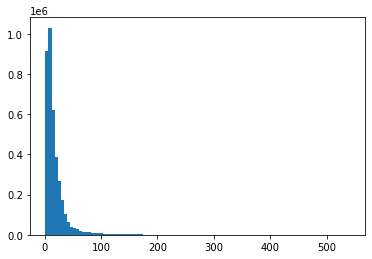

count                      3808741
mean     0 days 00:18:22.340564506
std      0 days 00:23:21.735330331
min                0 days 00:01:19
25%                0 days 00:06:52
50%                0 days 00:11:49
75%                0 days 00:21:21
max                0 days 09:00:59
Name: duration, dtype: object

(0.25% Quantile) All trips with a duration outside of 0 days 00:01:33 to 0 days 03:48:11.992500 will be removed!
That is 19025 out of 3818004 entries!


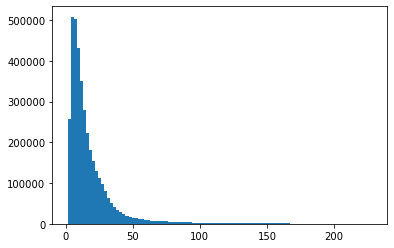

count                      3798979
mean     0 days 00:18:00.690816927
std      0 days 00:20:31.001258644
min                0 days 00:01:33
25%                0 days 00:06:53
50%                0 days 00:11:49
75%                0 days 00:21:19
max                0 days 03:48:11
Name: duration, dtype: object

(0.5% Quantile) All trips with a duration outside of 0 days 00:01:49 to 0 days 02:42:28 will be removed!
That is 37931 out of 3818004 entries!


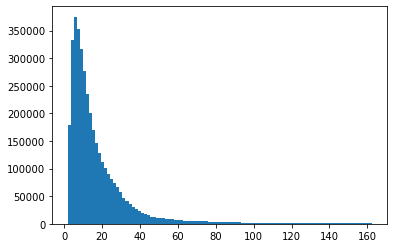

count                      3780073
mean     0 days 00:17:37.940601940
std      0 days 00:18:45.168339717
min                0 days 00:01:49
25%                0 days 00:06:54
50%                0 days 00:11:49
75%                0 days 00:21:15
max                0 days 02:42:28
Name: duration, dtype: object



In [9]:
%matplotlib inline
# Data to remove from top and bottom
def get_outside_time_frame_data(df, dt_column, lower_bound, upper_bound):
    return df[(df[dt_column] < lower_bound) | (df[dt_column] > upper_bound)]

quantiles = [0.00125, 0.0025, 0.005] # (0.125%; 0.25%; 0.5%) * 2
for quantile in quantiles:
    # amount = len(chicago_set[(chicago_set['duration'] < chicago_set.duration.quantile(quantile)) | (chicago_set['duration'] > chicago_set.duration.quantile(1 - quantile))])
    lower_bound = chicago_set.duration.quantile(quantile)
    upper_bound = chicago_set.duration.quantile(1 - quantile)
    amount = get_outside_time_frame_data(chicago_set, 'duration', lower_bound, upper_bound)
    print('(' + str(quantile*100) + '% Quantile) All trips with a duration outside of ' + str(lower_bound) + ' to ' + str(upper_bound) + ' will be removed!')
    print('That is ' + str(len(amount)) + ' out of ' + str(len(chicago_set)) + ' entries!')
    chicago_set_clean = chicago_set.drop(amount.index)
    plt.hist(chicago_set_clean['duration']/pd.Timedelta(minutes=1), bins=100)
    plt.show()
    print(str(chicago_set_clean['duration'].describe()) + '\n')

# Analysis of the adjusted dataset

In the next steps we want to visualize the following parts amount_of_rides_per_weekday, amoun_of_rides_per_month, rides_per_hour (here we could add the average duration per month/weekday/hour), amount_of_rides_from_station, amount_of_rides_to_station (later more clearly visualized with a heatmap). Further possible visualizations could be average_duration_per_start_station. We could add an inverse curve which is the available fleetsize per unit which is the result of the substraction of the rides/hour and the overall fleetsize.

## Analysis of the time components

### Extract week day as String and numeral from start time

In [10]:
chicago_set['day_of_week_name'] = chicago_set['start_time'].dt.day_name()
chicago_set['day_of_week'] = chicago_set['start_time'].dt.dayofweek
chicago_set.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration,day_of_week_name,day_of_week
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,0 days 00:06:30,Tuesday,1
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Subscriber,0 days 00:07:21,Tuesday,1
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Subscriber,0 days 00:13:49,Tuesday,1
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,0 days 00:29:43,Tuesday,1
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber,0 days 00:06:04,Tuesday,1


### Hot-encode weekday: turn number for day into boolean

In [11]:
chicago_set['monday'] = np.where(chicago_set['day_of_week'] == 0, 1, 0) #[chicago_set['day_of_week'] == 1]
day = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday']
for i in range(0,6):
    chicago_set[day[i]] = np.where(chicago_set['day_of_week'] == i, 1, 0)
    
chicago_set.sample(n=5)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration,day_of_week_name,day_of_week,monday,tuesday,wednesday,thursday,friday,saturday
3230729,2019-10-08 21:57:47,2019-10-08 22:05:05,56,186,Desplaines St & Kinzie St,Ogden Ave & Race Ave,2605,Subscriber,0 days 00:07:18,Tuesday,1,0,1,0,0,0,0
3473266,2019-10-29 16:19:51,2019-10-29 16:40:38,199,67,Wabash Ave & Grand Ave,Sheffield Ave & Fullerton Ave,6344,Subscriber,0 days 00:20:47,Tuesday,1,0,1,0,0,0,0
1179168,2019-06-12 11:48:35,2019-06-12 11:56:33,414,192,Canal St & Taylor St,Canal St & Adams St,3497,Subscriber,0 days 00:07:58,Wednesday,2,0,0,1,0,0,0
1645560,2019-07-11 07:32:51,2019-07-11 07:42:52,174,111,Canal St & Madison St,Sedgwick St & Huron St,4092,Subscriber,0 days 00:10:01,Thursday,3,0,0,0,1,0,0
623991,2019-04-29 18:17:49,2019-04-29 18:21:14,74,364,Kingsbury St & Erie St,Larrabee St & Oak St,1852,Subscriber,0 days 00:03:25,Monday,0,1,0,0,0,0,0


## Connections between days of the week and user behavior

start_time
Friday       11117.442308
Monday       10774.403846
Saturday      9523.442308
Sunday        8200.384615
Thursday     11313.211538
Tuesday      11263.076923
Wednesday    11231.192308
Name: start_time, dtype: float64


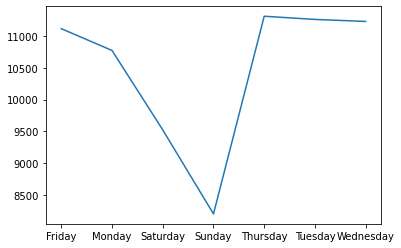

In [12]:
rides_started_per_weekday = chicago_set['start_time'].groupby(chicago_set['start_time'].dt.day_name()).agg('count')
rides_started_per_weekday = rides_started_per_weekday / 52
print(rides_started_per_weekday)
plt.plot(rides_started_per_weekday)


Wee see that during the week we have nearly constantly around 11k rides per weekday, during the weekend this number drops to around 9k rides per day with a low on Sundays.

start_time
Friday      0 days 00:23:35.697274034
Monday      0 days 00:21:32.424787021
Saturday    0 days 00:32:09.966994400
Sunday      0 days 00:31:40.571141128
Thursday    0 days 00:21:44.154524917
Tuesday     0 days 00:20:42.060515981
Wednesday   0 days 00:20:57.545375002
Name: duration, dtype: timedelta64[ns]


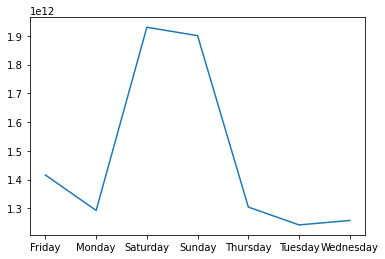

In [37]:
avg_duration_per_weekday = chicago_set.groupby(chicago_set['start_time'].dt.day_name())['duration'].mean()
print(avg_duration_per_weekday)
plt.plot(avg_duration_per_weekday)

Although we see that there are less rides on the weekend, the average duration is ca. 50% higher than during the week.

## Amount of rides per month

date_time
1.0     5.131579
2.0     4.638158
3.0     5.098684
4.0     4.927357
5.0     5.089090
6.0     4.908169
7.0     5.095943
8.0     5.079496
9.0     4.934211
10.0    5.091831
11.0    4.925987
12.0    5.095943
Name: max_temp, dtype: float64
date_time
1.0     5.131579
2.0     4.638158
3.0     5.098684
4.0     4.927357
5.0     5.089090
6.0     4.908169
7.0     5.095943
8.0     5.079496
9.0     4.934211
10.0    5.091831
11.0    4.925987
12.0    5.095943
Name: min_temp, dtype: float64


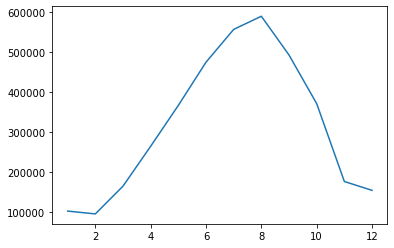

In [14]:
rides_per_month = chicago_set['start_time'].groupby(chicago_set['start_time'].dt.dayname).agg('count')

# adding the weather data into the visulisation
weather_set['date_time'] = pd.to_datetime(weather_set['date_time'])

# calculating the average max temp per month
avg_max_temp = weather_set['max_temp'].groupby(weather_set['date_time'].dt.month).agg('count')
avg_max_temp = avg_max_temp/(30.4*24)
print(avg_max_temp)
# calculate the average min temp per month
avg_min_temp = weather_set['min_temp'].groupby(weather_set['date_time'].dt.month).agg('count')
avg_min_temp = avg_min_temp/(30.4*24)
print(avg_min_temp)

# results of the avg temp seem to be wrong...

plt.plot(rides_per_month, label = "Rides per month")


# adding the different series into a dataframe with the rows months (1-12) and the columns ride_per_month,avg_min_temp and avg_max_temp
months = {'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'}
df_month = pd.DataFrame()
# df_month.append(months)


We see that in the first part of the year our service is the least percieved but demand is increasing till midth of September. In the summer months people are renting our bikes more regulary but the demand declines when the fall begins and temperatures are declining. We can add our temperature data in this picture and see a strong correlation between the average temperature and the demand of our bikesharing service.

### Average duration per month

start_time
1    0 days 00:17:03.691687969
2    0 days 00:17:01.762616181
3    0 days 00:16:48.936833905
4    0 days 00:20:14.907975575
5    0 days 00:22:09.303193834
6    0 days 00:23:08.452705644
7    0 days 00:30:05.687261243
8    0 days 00:32:16.736651620
9    0 days 00:23:57.675653208
10   0 days 00:21:48.746405190
11   0 days 00:18:11.863638416
12   0 days 00:16:54.909221623
Name: duration, dtype: timedelta64[ns]


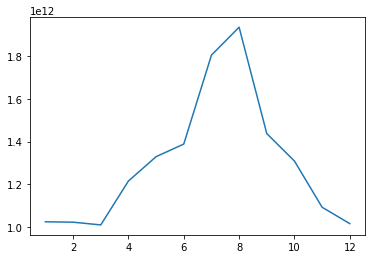

In [30]:
# timedelta to minutes/seconds
# chicago_set['duration'] = chicago_set['duration'].Timedelta.total_seconds()
avg_duration_per_month = chicago_set.groupby(chicago_set['start_time'].dt.month)['duration'].mean()
print(avg_duration_per_month)
plt.plot(avg_duration_per_month)



The duration is strongly correlated with the amount of rides (and therefore the temperature). We see longer rides between June and October, the same months where the amount of rides were the highest.

## Amount of rides per hour

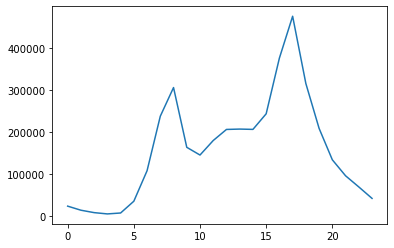

In [15]:
rides_per_hour = chicago_set['start_time'].groupby(chicago_set['start_time'].dt.hour).agg('count')
plt.plot(rides_per_hour)

We see two spikes of usage during the day: our services is getting used the most between 5am and 10 am and between 3pm and 7pm. We can assume that our users rent our bikes to get to the university/school/workplace or home. 

start_time
0    0 days 00:46:32.190921172
1    0 days 00:48:54.549282097
2    0 days 00:55:05.767313019
3    0 days 01:22:35.281055070
4    0 days 00:19:48.150982154
5    0 days 00:17:41.024685490
6    0 days 00:15:18.695866287
7    0 days 00:13:42.489213657
8    0 days 00:15:38.328491072
9    0 days 00:22:06.640939249
10   0 days 00:28:43.969229500
11   0 days 00:27:21.999816632
12   0 days 00:28:16.352877580
13   0 days 00:29:22.437977066
14   0 days 00:31:30.517154831
15   0 days 00:28:06.300907821
16   0 days 00:22:56.777961988
17   0 days 00:22:03.752579163
18   0 days 00:23:31.383108170
19   0 days 00:24:25.018011113
20   0 days 00:26:55.958892367
21   0 days 00:27:25.531649912
22   0 days 00:28:22.518313940
23   0 days 00:28:29.882498352
Name: duration, dtype: timedelta64[ns]


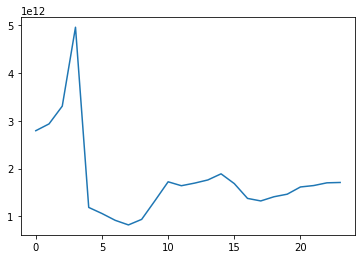

In [31]:
avg_duration_per_hour = chicago_set.groupby(chicago_set['start_time'].dt.hour)['duration'].mean()
print(avg_duration_per_hour)
plt.plot(avg_duration_per_hour)

We see a peak between 3 and 4am, so maybe drunk people need to get home and rely on our service.

### Average duration per start_station

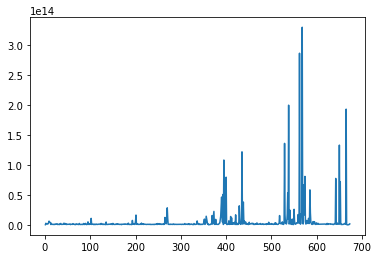

In [33]:
avg_duration_per_start_station = chicago_set.groupby(chicago_set['start_station_id'])['duration'].mean()

plt.plot(avg_duration_per_start_station)

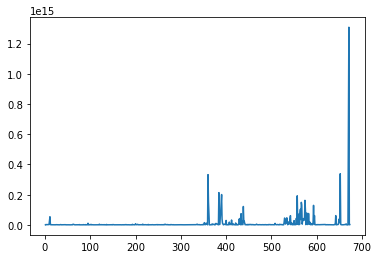

In [34]:
avg_duration_per_end_station = chicago_set.groupby(chicago_set['end_station_id'])['duration'].mean()

plt.plot(avg_duration_per_end_station)

## Analysis of the geographical data

### Visualizing the amount of trips started/ended per station

This should help us to improve the understanding of the location data before we'll visualize this in a heatmap in the further steps.

In [16]:
amount_of_start_stations = len(chicago_set['start_station_id'].unique())
print(amount_of_start_stations)

amount_of_end_stations = len(chicago_set['end_station_id'].unique())
print(amount_of_end_stations)



616
617


start_station_id
1          1
2      11030
3      26432
4      10658
5       7765
       ...  
666      543
669        1
671       15
672     3821
673     3390
Name: start_station_id, Length: 616, dtype: int64


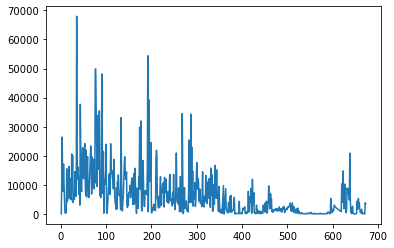

In [17]:
rides_started_per_station = chicago_set['start_station_id'].groupby(chicago_set['start_station_id']).agg('count')
print(rides_started_per_station)

plt.plot(rides_started_per_station)

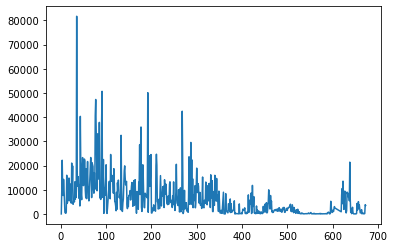

In [18]:
rides_ended_per_station = rides_ended_per_station = chicago_set['end_station_id'].groupby(chicago_set['end_station_id']).agg('count')
plt.plot(rides_ended_per_station)


There are 616 unique start_station_ids and 617 end_station_ids. We visualized the amount of rides started/ended per stations and see that some stations are more popular than others. We will analyze this investigation in the further steps and visualize it with a heatmap.

## Analyzing the location data

In the following part we try to visualize our data set. We want to make clear which time factory like months, time or weekday has influence on the demand. Furthermore, we try to find patterns of the duration and the time the service is getting used.

## Importing a dataset to findout the latitude and longitude of the stations

In [19]:
coordinates_sets = [pd.read_csv('202004-divvy-tripdata.csv')]
coordinates_sets.append(pd.read_csv('202005-divvy-tripdata.csv'))
coordinates_sets.append(pd.read_csv('202006-divvy-tripdata.csv'))
coordinates_sets.append(pd.read_csv('202007-divvy-tripdata.csv'))
coordinates_sets.append(pd.read_csv('202008-divvy-tripdata.csv'))
coordinates_sets[0].info()

FileNotFoundError: [Errno 2] No such file or directory: '202005-divvy-tripdata.csv'

## Get the relevant data, i.e. station_name, station_id, latitude & longitude

In [ ]:
global coordinates
for coordinates_set in coordinates_sets:
    coordinates1 = coordinates_set[['start_station_name', 'start_station_id', 'start_lat', 'start_lng']]
    coordinates2 = coordinates_set[['end_station_name', 'end_station_id', 'end_lat', 'end_lng']]

    coordinates1 = coordinates1.rename(columns={'start_station_name': 'station_name', 'start_station_id': 'station_id', 'start_lat': 'latitude', 'start_lng':'longitude'})
    coordinates2 = coordinates2.rename(columns={'end_station_name': 'station_name', 'end_station_id': 'station_id', 'end_lat': 'latitude', 'end_lng':'longitude'})

    coordinates_new = pd.concat([coordinates1, coordinates2], ignore_index = True)
    coordinates = pd.concat([coordinates, coordinates_new], ignore_index = True)
    print(coordinates_new['station_name'].nunique())
print(coordinates['station_name'].nunique())

In [ ]:
coordinates['station_id'] = coordinates['station_id'].replace([np.inf, -np.inf], np.nan)
coordinates_dropped = coordinates.dropna()
coordinates_dropped.info()

#### Get all unique rows based on station_id

In [ ]:
coordinates_unique = coordinates_dropped.drop_duplicates(subset = ['station_id'], keep = 'last')
#coordinates_unique['station_id'] = coordinates_unique['station_id'].replace([np.inf, -np.inf], np.nan)
coordinates_unique = coordinates_unique.dropna()
coordinates_unique.info()

In [ ]:
coordinates_unique = coordinates_unique[np.isfinite(coordinates_unique['station_id'])]
coordinates_unique['station_id'] = coordinates_unique['station_id'].astype('int64')
coordinates_unique.info()

In [ ]:
print(chicago_set_clean['start_station_id'].nunique())
print(chicago_set_clean['end_station_id'].nunique())
chicago_set_clean.info()

In [ ]:
chicago_set_merge = chicago_set_clean.merge(coordinates_unique, how='left', left_on='start_station_id', right_on='station_id')
chicago_set_merge = chicago_set_merge.rename(columns={'latitude': 'start_latitude', 'longitude': 'start_longitude'})
chicago_set_merge = chicago_set_merge.merge(coordinates_unique, how='left', left_on='end_station_id', right_on='station_id')
chicago_set_merge = chicago_set_merge.rename(columns={'latitude': 'end_latitude', 'longitude': 'end_longitude'})
chicago_set_merge = chicago_set_merge.drop(['station_name_x', 'station_id_x', 'station_name_y', 'station_id_y'],axis = 1)
chicago_set_merge.head()

In [ ]:
chicago_set_merge.info()

### We have multiple Stations not included in the data set we get the location from:
##### DIVVY Map Frame B/C Station, DIVVY CASSETTE REPAIR MOBILE STATION, Ellis Ave & 60th St, TS ~ DIVVY PARTS TESTING, Sedgwick St & Huron St, Special Events, LBS - BBB La Magie
Since many of these Station names don't seem like actual stations we could simply delete them from the data set since they only total 83 entries.
Otherwise the entries could be manually added with the command
extra = {'station_name': 'DIVVY Map Frame B/C Station', 'station_id': 360, 'latitude': -1, 'longitude': -1}
coordinates_unique = coordinates_unique.append(extra, ignore_index = True)

In [ ]:
chicago_set_merge.loc[chicago_set_merge.isnull().any(axis=1)]

### Drop rows with null values

In [ ]:
chicago_set_merge = chicago_set_merge.dropna()

#### Haversine method from https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points

In [ ]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

### Calculate Haversine distance for unique start and stop combinations and merge it back into chicago set

In [ ]:
chicago_set_distance = chicago_set_merge[['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude']]
chicago_set_distance = chicago_set_distance.drop_duplicates(subset = ['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude'], keep = 'last')
chicago_set_distance['distance'] = chicago_set_distance.apply(lambda x : haversine(x['start_latitude'], x['start_longitude'], x['end_latitude'], x['end_longitude'],) , axis=1)
chicago_set_merge = chicago_set_merge.merge(chicago_set_distance, how='left', on=['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude'])
chicago_set_merge.head()

### Average speed in meters per second

In [ ]:
chicago_set_merge['speed'] = chicago_set_merge['distance'] * 1000 / chicago_set_merge['duration'].dt.total_seconds()
chicago_set_merge.head()